<a href="https://colab.research.google.com/github/hany606/PMLDL_Fall21IU/blob/main/Optional/HanyHamed_PMLDL2021_HW_4_batch_optional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hany Hamed Solution

In [ ]:
%matplotlib inline

PML&DL Homework (optional)
=============================
Based on the Tutorial: https://docs.dgl.ai/en/0.4.x/tutorials/basics/4_batch.html 

Instructions for the assignment are given in tags: [PMLDL] ... [/PMLDL]

Graph classification is an important problem
with applications across many fields, such as bioinformatics, chemoinformatics, social
network analysis, urban computing, and cybersecurity. Applying graph neural
networks to this problem has been a popular approach recently. This can be seen in the following reserach references: 
`Ying et al., 2018 <https://arxiv.org/abs/1806.08804>`_,
`Cangea et al., 2018 <https://arxiv.org/abs/1811.01287>`_,
`Knyazev et al., 2018 <https://arxiv.org/abs/1811.09595>`_,
`Bianchi et al., 2019 <https://arxiv.org/abs/1901.01343>`_,
`Liao et al., 2019 <https://arxiv.org/abs/1901.01484>`_,
`Gao et al., 2019 <https://openreview.net/forum?id=HJePRoAct7>`_).


Simple graph classification task
--------------------------------
In this tutorial, you learn how to perform batched graph classification
with DGL. The example task objective is to classify eight types of topologies shown here.

![](https://data.dgl.ai/tutorial/batch/dataset_overview.png)

    :align: center

Implement a synthetic dataset :class:`data.MiniGCDataset` in DGL. The dataset has eight 
different types of graphs and each class has the same number of graph samples.



In [2]:
pip install dgl-cu113 -f https://data.dgl.ai/wheels/repo.html


Looking in links: https://data.dgl.ai/wheels/repo.html
     |████████████████████████████████| 152.9 MB 37 kB/s 


In [109]:
import dgl
from dgl.data import MiniGCDataset
import numpy as np
import dgl.contrib.sampling.randomwalk

# Sources to check: 
# https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef
# http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
# https://github.com/eliorc/Medium/blob/master/Nod2Vec-FIFA17-Example.ipynb
# https://towardsdatascience.com/complete-guide-to-understanding-node2vec-algorithm-4e9a35e5d147
# https://stellargraph.readthedocs.io/en/stable/demos/node-classification/node2vec-node-classification.html
# https://stellargraph.readthedocs.io/en/stable/demos/embeddings/node2vec-embeddings.html

'''
[PMLDL]
Check the MiniGCDataset source code and implement a class that generated a vector of features for each node (e.g. using node2vec).
So, result would be a YourNameItGCDataset class. 
[/PMLDL]
''' 

class HanyHamedGCDataset(MiniGCDataset):
    def __init__(self, *args, **kwargs):
        # self.dimensions = kwargs.get("dimensions", 50) 
        self.walk_length = kwargs.get("walk_length", 50) 
        self.num_walks = kwargs.get("num_walks", 1) 

        kwargs.pop("walk_length", None)
        kwargs.pop("num_walks", None)

        super(HanyHamedGCDataset, self).__init__(*args, **kwargs)
        self. walk_length -= 1
        # self.model_features = self.gen_feature_vector(self.graphs, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks, window=window, min_count=min_count)
        # self.edges_embs = HadamardEmbedder(keyed_vectors=self.model_features.wv)

    def gen_feature_vector(self, g, dimensions, walk_length, num_walks, window, min_count):
        # Compute the feature vector
        # Source: https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef
        g_networkx = dgl.batch(g).to_networkx()
        node2vec = Node2Vec(g_networkx, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks)
        model = node2vec.fit(window=window, min_count=min_count)
        # print(dgl.batch(g).nodes())
        # Do node2vec using word2vec (Source: https://stellargraph.readthedocs.io/en/stable/demos/node-classification/node2vec-node-classification.html) 
        # nodes = dgl.batch(g).nodes()
        # dgl.sampling.random_walk(g.nodes(), [0, 1, 2, 0], length=walk_length)
        # str_walks = [[str(n) for n in walk] for walk in walks]
        # from gensim.models import Word2Vec
        # model = Word2Vec(str_walks, size=128, window=5, min_count=0, sg=1, workers=2, iter=1)

        return model


    def __getitem__(self, idx):
        # Source: https://github.com/eliorc/Medium/blob/master/Nod2Vec-FIFA17-Example.ipynb
        # model_features = self.gen_feature_vector(self.graphs[idx], dimensions=dimensions, walk_length=walk_length, num_walks=num_walks, window=window, min_count=min_count)
        # print(self.graphs[idx])
        # nodes = [x for x in model.wv.vocab if len(x) > 3 and x not in clubs]
        # embeddings = np.array(self.model_features.wv[self.graphs[idx].nodes()])
        # Source: https://github.com/eliorc/node2vec
        # self.edges_embs = HadamardEmbedder(keyed_vectors=self.model_features.wv)
        # print(edges_embs[('1', '2')])
        # print(self.graphs[idx].edges())
        # embeddings = self.edges_embs[self.graphs[idx].edges()]
        # embeddings = self.model_features.wv[self.graphs[idx].nodes()]
        # embeddings = dgl.sampling.node2vec_random_walk(self.graphs[idx], np.random.randint(len(self.graphs[idx].nodes()), size=len(self.graphs[idx].in_degrees())), 1, 1, walk_length=self.walk_length)
        embeddings = dgl.sampling.node2vec_random_walk(self.graphs[idx], np.random.randint(len(self.graphs[idx].nodes()), size=self.num_walks), 1, 1, walk_length=self.walk_length)
        return self.graphs[idx], embeddings, self.labels[idx]


import matplotlib.pyplot as plt
import networkx as nx
# A dataset with 80 samples, each graph is
# of size [10, 20]
# dataset = MiniGCDataset(80, 10, 20)
# graph, label = dataset[0]

'''
[PMLDL]

Here YourNameItGCDataset dataset[0] should return a three elements: 
graph, node_features, label = dataset[0]
node_features stores all node features of the graph

[/PMLDL]
''' 
dataset = HanyHamedGCDataset(80, 10, 20)
graph, node_features, label = dataset[0]



Form a graph mini-batch
-----------------------
To train neural networks efficiently, a common practice is to batch
multiple samples together to form a mini-batch. Batching fixed-shaped tensor
inputs is common. For example, batching two images of size 28 x 28
gives a tensor of shape 2 x 28 x 28. By contrast, batching graph inputs
has two challenges:

* Graphs are sparse.
* Graphs can have various length. For example, number of nodes and edges.

To address this, DGL provides a :func:`dgl.batch` API. It leverages the idea that
a batch of graphs can be viewed as a large graph that has many disjointed 
connected components. Below is a visualization that gives the general idea.

![](https://data.dgl.ai/tutorial/batch/batch.png)

    :width: 400pt
    :align: center

Define the following ``collate`` function to form a mini-batch from a given
list of graph and label pairs.



In [33]:
import dgl
import torch

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

'''
[PMLDL]

Here you need to implement a new version of the collate(...) function.
New version should collate (stack) the graph, features and labels in a mini-batch.

[/PMLDL]
''' 

def new_collate(samples):
    graphs, node_features, labels = map(list, zip(*samples))
    node_features = torch.cat(node_features, dim=0)
    batched_graph = dgl.batch(graphs)
    return batched_graph, node_features, torch.tensor(labels)


The return type of :func:`dgl.batch` is still a graph. In the same way, 
a batch of tensors is still a tensor. This means that any code that works
for one graph immediately works for a batch of graphs. More importantly,
because DGL processes messages on all nodes and edges in parallel, this greatly
improves efficiency.

Graph classifier
----------------
Graph classification proceeds as follows.

![](https://data.dgl.ai/tutorial/batch/graph_classifier.png)


From a batch of graphs, perform message passing and graph convolution
for nodes to communicate with others. After message passing, compute a
tensor for graph representation from node (and edge) attributes. This step might 
be called readout or aggregation. Finally, the graph 
representations are fed into a classifier $g$ to predict the graph labels.

Graph convolution layer can be found in the ``dgl.nn.<backend>`` submodule.



In [10]:
from dgl.nn.pytorch import GraphConv

Readout and classification
--------------------------
For this demonstration, consider initial node features to be their degrees.
After two rounds of graph convolution, perform a graph readout by averaging
over all node features for each graph in the batch.

\begin{align}h_g=\frac{1}{|\mathcal{V}|}\sum_{v\in\mathcal{V}}h_{v}\end{align}

In DGL, :func:`dgl.mean_nodes` handles this task for a batch of
graphs with variable size. You then feed the graph representations into a
classifier with one linear layer to obtain pre-softmax logits.



In [111]:
import torch.nn as nn
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)

        self.conv1 = GraphConv(in_dim, hidden_dim)#, norm="none")
        self.conv2 = GraphConv(hidden_dim, hidden_dim)
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g, features):
        '''
        [PMLDL]
        This call: h = g.in_degrees().view(-1, 1).float()
        feeds nodes degees list into input of the GCN (so, in_dim == 1).

        Here you need to change the code to feed features of nodes into input layer.
        Thus, in_dim will be the dimension of a feature-vector (say, 50). 
        In the lecture slides such vector for a node v was called x_v

        [/PMLDL]
        ''' 

        '''
        Reply: 
            From GraphConv -> def forward(self, graph, feat, weight=None, edge_weight=None):
            However, when I pass the features, I got the following error
            "RuntimeError: The size of tensor a (32) must match the size of tensor b (443) at non-singleton dimension 0"

            Also, when specifying the in_dim as 50 I got the following error which seems that the matrix of weights should be 
            mat1 and mat2 shapes cannot be multiplied (418x1 and 50x256)

            So, it is some part of the code, the matrix dimension is related to the number of the in-degree of the nodes in the graph

            Thus, I have changed the layers to normal FC to feed forward the feature vector
        '''
        # This works somehow for having GraphConv
        # But the in_dim should be 1 not 50
        # h = features.view(-1, 1)[:len(g.in_degrees())]
        # # Perform graph convolution and activation function.
        # h = F.relu(self.conv1(g, h))
        # h = F.relu(self.conv2(g, h))
        # g.ndata['h'] = h
        # # Calculate graph representation by averaging all the node representations.
        # hg = dgl.mean_nodes(g, 'h')
        # return self.classify(hg)

        h = F.relu(self.fc1(features.float()))
        h = F.relu(self.fc2(h))
        return self.classify(h)


Setup and training
------------------
Create a synthetic dataset of $400$ graphs with $10$ ~
$20$ nodes. $320$ graphs constitute a training set and
$80$ graphs constitute a test set.



In [112]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Create training and test sets.
'''
[PMLDL]

Here calls to the YourNameItGCDataset class

[/PMLDL]
''' 
# trainset = MiniGCDataset(320, 10, 20)
# testset = MiniGCDataset(80, 10, 20)

trainset = HanyHamedGCDataset(320, 10, 20, walk_length=50)
testset = HanyHamedGCDataset(80, 10, 20, walk_length=50)


# Use PyTorch's DataLoader and the collate function
# defined before.
'''
[PMLDL]

Here pass new version of collate()

[/PMLDL]
''' 
# data_loader = DataLoader(trainset, batch_size=32, shuffle=True,
#                          collate_fn=collate)

data_loader = DataLoader(trainset, batch_size=32, shuffle=True,
                         collate_fn=new_collate)


# Create model
'''
[PMLDL]

Here pass new dimension of input (say, 50) as the first parameter.

[/PMLDL]
''' 

# model = Classifier(1, 256, trainset.num_classes)
# model = Classifier(1, 256, trainset.num_classes)
model = Classifier(50, 256, trainset.num_classes)

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
model.train()

epoch_losses = []
for epoch in range(80):
    epoch_loss = 0
    for iter, (bg, features, label) in enumerate(data_loader):
        # print(iter)
        prediction = model(bg, features)
        loss = loss_func(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
        # print('Epoch {}, loss {:.4f}'.format(iter, epoch_loss))
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)

Epoch 0, loss 2.5636
Epoch 1, loss 2.0684
Epoch 2, loss 1.9937
Epoch 3, loss 1.8868
Epoch 4, loss 1.8025
Epoch 5, loss 1.8171
Epoch 6, loss 1.9123
Epoch 7, loss 1.7805
Epoch 8, loss 1.7166
Epoch 9, loss 1.6958
Epoch 10, loss 1.6968
Epoch 11, loss 1.6946
Epoch 12, loss 1.6038
Epoch 13, loss 1.6266
Epoch 14, loss 1.7650
Epoch 15, loss 1.6501
Epoch 16, loss 1.5981
Epoch 17, loss 1.6174
Epoch 18, loss 1.5785
Epoch 19, loss 1.5537
Epoch 20, loss 1.5776
Epoch 21, loss 1.4827
Epoch 22, loss 1.5250
Epoch 23, loss 1.5682
Epoch 24, loss 1.4929
Epoch 25, loss 1.4253
Epoch 26, loss 1.5012
Epoch 27, loss 1.5129
Epoch 28, loss 1.4968
Epoch 29, loss 1.4650
Epoch 30, loss 1.4796
Epoch 31, loss 1.4907
Epoch 32, loss 1.4417
Epoch 33, loss 1.4887
Epoch 34, loss 1.4710
Epoch 35, loss 1.5447
Epoch 36, loss 1.4465
Epoch 37, loss 1.4268
Epoch 38, loss 1.4153
Epoch 39, loss 1.5202
Epoch 40, loss 1.5098
Epoch 41, loss 1.4519
Epoch 42, loss 1.4201
Epoch 43, loss 1.3994
Epoch 44, loss 1.3619
Epoch 45, loss 1.462

The learning curve of a run is presented below.



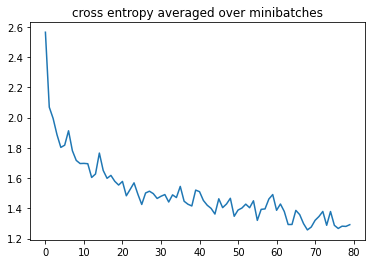

In [113]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

The trained model is evaluated on the test set created. To deploy
the tutorial, restrict the running time to get a higher
accuracy ($80$ % ~ $90$ %) than the ones printed below.



In [114]:
model.eval()
# Convert a list of tuples to two lists
'''
[PMLDL]

Slightly modify this code to evaluate results, as batch should contain three elements

[/PMLDL]
''' 
test_X, test_F, test_Y = map(list, zip(*testset))
test_bg = dgl.batch(test_X)
test_Y = torch.tensor(test_Y).float().view(-1, 1)
test_F = torch.cat(test_F, dim=0)
probs_Y = torch.softmax(model(test_bg, test_F), 1)
sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_Y == sampled_Y.float()).sum().item() / len(test_Y) * 100))
print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
    (test_Y == argmax_Y.float()).sum().item() / len(test_Y) * 100))

Accuracy of sampled predictions on the test set: 35.0000%
Accuracy of argmax predictions on the test set: 50.000000%




What's next?
------------
Graph classification with graph neural networks is still a new field.
It's waiting for people to bring more exciting discoveries. The work requires 
mapping different graphs to different embeddings, while preserving
their structural similarity in the embedding space. To learn more about it, see 
`How Powerful Are Graph Neural Networks? <https://arxiv.org/abs/1810.00826>`_ a research paper  
published for the International Conference on Learning Representations 2019.

For more examples about batched graph processing, see the following:

* Tutorials for `Tree LSTM <https://docs.dgl.ai/tutorials/models/2_small_graph/3_tree-lstm.html>`_ and `Deep Generative Models of Graphs <https://docs.dgl.ai/tutorials/models/3_generative_model/5_dgmg.html>`_
* An example implementation of `Junction Tree VAE <https://github.com/dmlc/dgl/tree/master/examples/pytorch/jtnn>`_

